ДЗ на 1.11.2021. Датасет задержек.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    
fl = pd.read_csv(url1, sep=',')
we = pd.read_csv(url2, sep=',')

In [6]:
fl.head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [10]:
we.head(5)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


# 1. Зависимость скорости ветра и задержек

In [13]:
fl_we = fl.merge(we, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
fl_we.head(5)

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,Unnamed: 0_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


In [40]:
windspeedcor = pd.DataFrame(fl_we.groupby('wind_speed')['dep_delay'].mean()).reset_index()
windspeedcor = windspeedcor.drop(windspeedcor[windspeedcor.wind_speed >100].index) #удалил, т.к. есть строки с wind_speed>1000

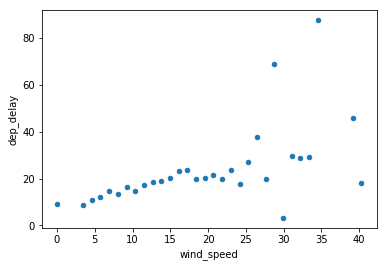

In [41]:
windspeedcor.plot.scatter('wind_speed','dep_delay')

Вывод 1. Среднее время задержки коррелирует с скоростью ветра положительным образом.

# 2.Средняя задержка по месяццам

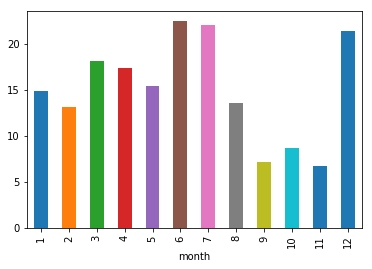

In [42]:
monthcor = fl_we.groupby('month')['dep_delay'].mean()
monthcor.plot.bar()

Вывод 2. Задержки учащаются во время туристического сезона.При большом потоке и большей заполненности рейса шанс на опоздание пассажира больше.

# 3.Зависимость влажности и задержек.

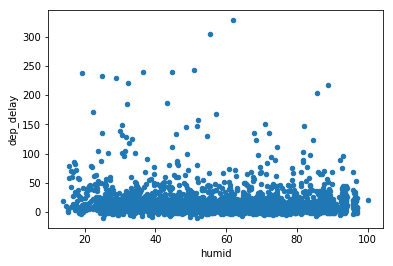

In [56]:
humidcor = pd.DataFrame(fl_we.groupby('humid')['dep_delay'].mean()).reset_index()
#humidcor = windspeedcor.drop(windspeedcor[windspeedcor.wind_speed >100].index) #удалил, т.к. есть строки с wind_speed>1000
humidcor
humidcor.plot.scatter('humid','dep_delay')

Вывод 3. Судя по этой выборке влажность не является ключевым фактором.

# 4.Общее число задержанных рейсов

In [88]:
delay = fl['dep_delay']
delayed=delay.gt(0).sum()
total=len(fl)
print('Delayed flights percentage: ',delayed*100/total)

Delayed flights percentage:  38.13573413782455


Вывод 4.Почти 40 процентов рейсов задерживаются.

# 5.Зависимости задержки и дня недели

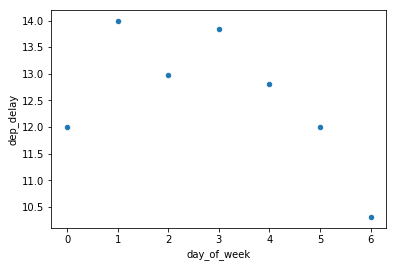

In [116]:
dfa = pd.DataFrame({"dep_delay":fl['dep_delay'],"day_of_week": fl['day']%7})
weekcor = pd.DataFrame(dfa.groupby('day_of_week')['dep_delay'].mean()).reset_index()
weekcor.plot.scatter('day_of_week','dep_delay')

Вывод 5.Имеется зависимость средней задержки и дня недели.

# 6.Зависимости задержки и времени суток

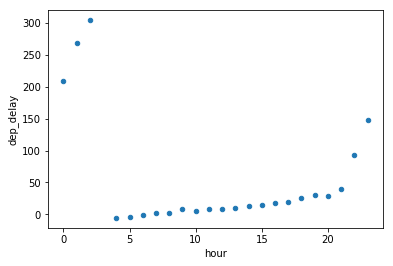

In [118]:
hourcor = pd.DataFrame(fl_we.groupby('hour')['dep_delay'].mean()).reset_index()
hourcor.plot.scatter('hour','dep_delay')

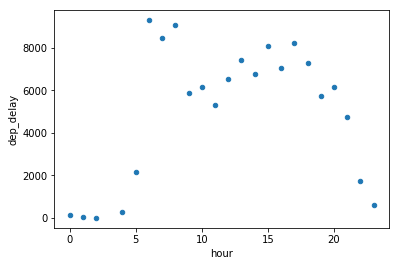

In [125]:
hourqua = pd.DataFrame(fl_we.groupby('hour')['dep_delay'].size()).reset_index()
hourqua.plot.scatter('hour','dep_delay')

Вывод 6(+7).В тёмное время суток задержки больше.В тёмное время суток рейсов меньше.